# Unidad 4 - Análisis exploratorio de datos: Visualizaciones
### **Ejercicio N°2**
El dataset `registro_temperatura365d_smn.txt` contiene las temperaturas máximas y mínimas registradas diariamente entre el 03/10/2023 y el 01/10/2024 en todas las estaciones meteorológicas de superficie pertenecientes al Servicio Meteorológico Nacional.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Explore la estructura del archivo. Notará que no se utiliza un delimitador particular para separar las distintas columnas sino que los distintos campos están alineados en columnas con diferente número de espacios que separan uno del otro. Por este motivo, y aprovechando que las primeras columnas son de ancho fijo, se sugiere utilizar la función `read_fwf()` de Pandas, que permite leer este tipo de archivos.

<br />

<div style="border-left: 4px solid #8a1717; padding: 0.5em; background: #f9f9f9;">
La función <code>pd.read_fwf()</code> en Pandas se utiliza para leer archivos de texto que tienen columnas de ancho fijo, donde cada columna ocupa una cantidad específica de caracteres. Esta función es útil cuando los datos no están separados por delimitadores como comas o espacios, sino que están organizados en columnas de longitudes fijas.

Al emplear esta función se deben definir los anchos de las columnas mediante el parámetro <code>colspecs</code>. Esto se hace proporcionando una lista de tuplas, donde cada tupla indica el rango de posiciones que corresponden a cada columna. Como ayuda, en nuestro caso <code>colspecs</code> comienza con la tupla (0, 8) para definir los límites de la columna <code>FECHA</code>, es decir: <code>colspecs = [(0, 8), ...]</code>.

<code>read_fwf()</code> ignora los espacios en blanco al cargar los datos, por lo que no es necesario preocuparse por los espacios adicionales que puedan existir.
</div>


In [ ]:
df = pd.read_fwf('/content/registro_temperatura365d_smn.txt',
                 encoding='latin-1',
                 skiprows=[1])
df = df.drop(0).reset_index(drop=True)
df.head(10)

,FECHA,TMAX,TMIN,NOMBRE
0,01102024,22.3,14.5,AEROPARQUE AERO
1,01102024,16.9,4.6,AZUL AERO
2,01102024,17.1,7.3,BAHIA BLANCA AERO
3,01102024,6.6,-1.1,BARILOCHE AERO
4,01102024,-10.0,-16.2,BASE BELGRANO II
5,01102024,-4.4,-11.0,BASE CARLINI (EX JUBANY)
6,01102024,-9.5,-14.5,BASE ESPERANZA
7,01102024,-13.2,-21.6,BASE MARAMBIO
8,01102024,-8.3,-12.8,BASE ORCADAS
9,01102024,-7.1,-15.4,BASE SAN MARTIN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43232 entries, 0 to 43231
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   43232 non-null  object
 1   TMAX    40375 non-null  object
 2   TMIN    42651 non-null  object
 3   NOMBRE  43232 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,FECHA,TMAX,TMIN,NOMBRE
count,43232,40375,42651,43232
unique,365,673,595,119
top,03102023,28.0,20.0,AEROPARQUE AERO
freq,119,386,427,365


In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'],format='%d%m%Y')
df.head()

,FECHA,TMAX,TMIN,NOMBRE
0,2024-10-01,22.3,14.5,AEROPARQUE AERO
1,2024-10-01,16.9,4.6,AZUL AERO
2,2024-10-01,17.1,7.3,BAHIA BLANCA AERO
3,2024-10-01,6.6,-1.1,BARILOCHE AERO
4,2024-10-01,-10.0,-16.2,BASE BELGRANO II



<br />

2. Construya un gráfico que le permita comparar las distribuciones de temperaturas mínimas y máximas diarias entre los últimos 12 meses (octubre 2023 a septiembre 2024) registradas en la estación del Aeropuerto Rosario (”ROSARIO AERO”).



In [ ]:
df["MES"] =df['FECHA'].dt.month
meses = {1: 'Enero',
         2: 'Febrero',
         3: 'Marzo',
         4: 'Abril',
         5: 'Mayo',
         6: 'Junio',
         7: 'Julio',
         8: 'Agosto',
         9: 'Septiembre',
         10: 'Octubre',
         11: 'Noviembre',
         12: 'Diciembre',
         }
df["MES"] = df["FECHA"].dt.month.map(meses)
df.head()

,FECHA,TMAX,TMIN,NOMBRE,MES
0,2024-10-01,22.3,14.5,AEROPARQUE AERO,Octubre
1,2024-10-01,16.9,4.6,AZUL AERO,Octubre
2,2024-10-01,17.1,7.3,BAHIA BLANCA AERO,Octubre
3,2024-10-01,6.6,-1.1,BARILOCHE AERO,Octubre
4,2024-10-01,-10.0,-16.2,BASE BELGRANO II,Octubre


In [ ]:
df_melted = pd.melt(df,
                    id_vars=["FECHA", "NOMBRE", "MES"],  # columnas que se mantienen
                    value_vars=["TMAX", "TMIN"],  # columnas a derretir
                    var_name='TIPO',  # nombre de la nueva columna identificadora
                    value_name='TEMPERATURA')  # nombre de la nueva columna de valores
df_melted.head()

,FECHA,NOMBRE,MES,TIPO,TEMPERATURA
0,2024-10-01,AEROPARQUE AERO,Octubre,TMAX,22.3
1,2024-10-01,AZUL AERO,Octubre,TMAX,16.9
2,2024-10-01,BAHIA BLANCA AERO,Octubre,TMAX,17.1
3,2024-10-01,BARILOCHE AERO,Octubre,TMAX,6.6
4,2024-10-01,BASE BELGRANO II,Octubre,TMAX,-10.0


In [ ]:
print(f'El dataframe original tiene {len(df)}, mientras que el de formato largo {len(df_melted)}')

El dataframe original tiene 43232, mientras que el de formato largo 86464


In [ ]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86464 entries, 0 to 86463
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        86464 non-null  datetime64[ns]
 1   NOMBRE       86464 non-null  object        
 2   MES          86464 non-null  object        
 3   TIPO         86464 non-null  object        
 4   TEMPERATURA  83026 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.3+ MB


In [ ]:
df_melted["TEMPERATURA"] = df_melted["TEMPERATURA"].astype(float)

In [ ]:
df_melted.describe()

,FECHA,TEMPERATURA
count,86464,83026.000000
mean,2024-04-02 00:02:59.866765568,15.590581
min,2023-10-03 00:00:00,-37.600000
25%,2024-01-01 00:00:00,7.600000
50%,2024-04-02 00:00:00,16.200000
75%,2024-07-02 00:00:00,23.600000
max,2024-10-01 00:00:00,46.000000
std,NaN,11.368962


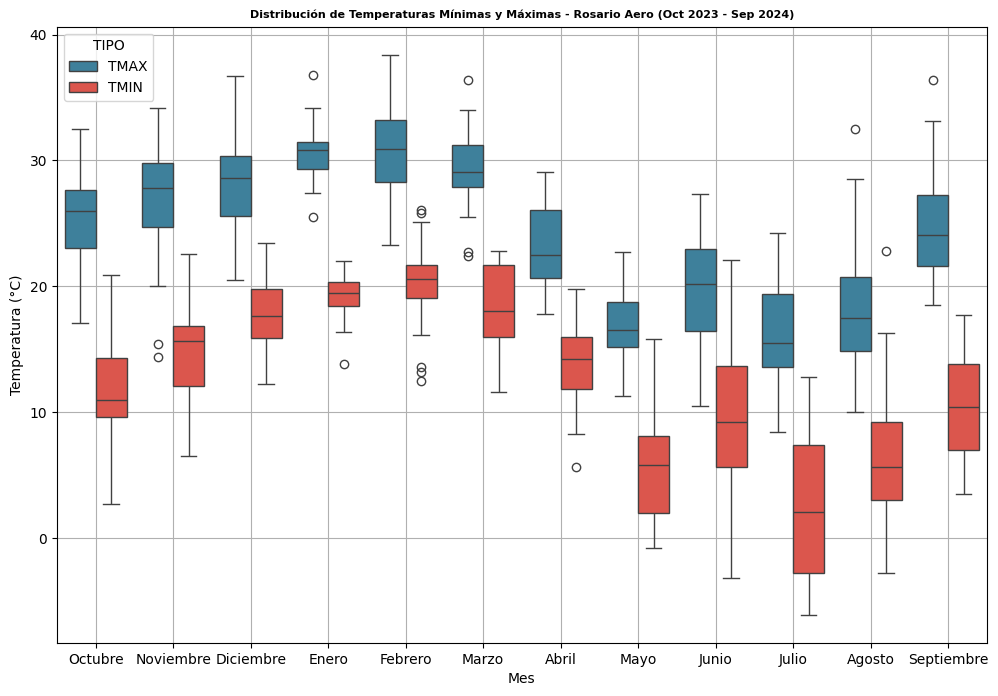

In [ ]:
plt.figure(figsize=(12,8))
palette = ['#2E86AB', '#F24236']
sns.boxplot(df_melted[df_melted['NOMBRE'] == "ROSARIO AERO"].sort_values('FECHA'), x='MES', y='TEMPERATURA', hue='TIPO', palette=palette)
plt.title('Distribución de Temperaturas Mínimas y Máximas - Rosario Aero (Oct 2023 - Sep 2024)', weight='bold', fontsize=8)
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.grid()
plt.show()


3. En base al gráfico realizado, responda las siguientes preguntas:

- ¿Cuál fue el mes del último año con la mayor temperatura máxima mediana?

Febrero. Apenas más alto que Enero.
- ¿Cuál fue el mes del último año con la menor temperatura mínima mediana?

Julio
- Considerando la variabilidad del 50% central de las temperaturas registradas en el mes, ¿cuál fue el mes del último año con una menor dispersión tanto en sus temperaturas mínimas como en sus temperaturas máximas?

Enero
- ¿Cuál fue el mes del último año que presentó una mayor amplitud en sus temperaturas mínimas registradas?

Julio
- Considerando los meses del invierno 2024, ¿existió algún mes en el cual se haya registrado una temperatura máxima atípica en relación al resto de los registros de ese mes?

Sí, agosto registra una temperatura máxima atípica (outlier)

    
4. Realice nuevamente el ítem 2 con los datos correspondientes a la estación meteorológica localizada en la Base Marambio de la Antártida Argentina. Compare los dos gráficos y comente las diferencias que encuentra en las distribuciones de las temperaturas registradas en ambas estaciones.

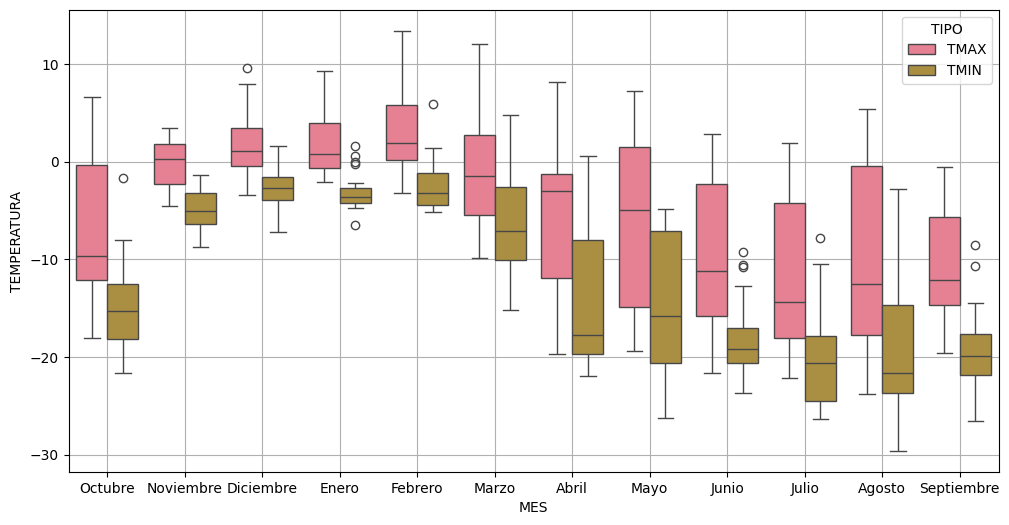

In [ ]:
plt.figure(figsize=(12,6))
#sns.boxplot(df_melted[df_melted['NOMBRE'] == "ROSARIO AERO"].sort_values('FECHA'), x='MES', y='TEMPERATURA', hue='TIPO', palette=palette)
sns.boxplot(df_melted[df_melted["NOMBRE"] == "BASE MARAMBIO"].sort_values("FECHA"), x='MES', y='TEMPERATURA', hue="TIPO")
plt.grid()
plt.show()